<center>Jaime Francisco Barbosa Hernández     615152<center>



    
<center>SC3314 – Inteligencia Artificial Universidad de Monterrey Dr. Antonio Martínez Torteya<center>


# A2.1 Regresión logística y validación cruzada

En esta actividad trabajarás con la misma base de datos que trabajaste en el proyecto del primer parcial.

Desarrolla los siguientes puntos en una Jupyter Notebook, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el markdown para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Diccionario

[Link de descarga del Diccionario](https://drive.google.com/file/d/1yIrkksD5C3p7XIMlFOkptb_ExQWXf124/view?usp=sharing)

1. Importa los datos a tu ambiente de trabajo. Especifica qué variable utilizarás comovariable de salida, debe tratarse de una variable binaria. Si no hay ninguna variable binaria de interés, binariza la variable de salida que utilizaste en el proyecto (si trataste de predecir el precio de las casas, genera una variable que indique si una casa cuesta más que cierto monto, o menos).

In [15]:
df_raw= pd.read_csv("ce2019_nl.csv", index_col=False,low_memory=False)
print(df_raw.head())
print()
print(df_raw.shape)

print()

df=df_raw.copy()

# Eliminacion de Huecos
umbral = 0.50
mask = df.isna().mean(axis=1) < umbral

df = df.loc[mask].copy()

# Imputacion de ceros

num_cols = df.select_dtypes(include=[np.number]).columns

means = df[num_cols].mean()

df[num_cols] = df[num_cols].replace(0, np.nan)
df[num_cols] = df[num_cols].fillna(means)

# OutLiers

q1=df.K412A.quantile(0.25)

q3=df.K412A.quantile(0.75)

iqr=q3-q1

k=8
ll=q1-k*iqr
ul=q3+k*iqr


out=np.where((df.K412A<=ll)|(df.K412A>=ul))[0]

df = df.drop(df.index[out]).reset_index(drop=True)


# Proceso de binarzación
y_temp=df.K412A

promedio = y_temp.mean()
print(f"Promedio de K412A: {promedio}")
print()

y = (df['K412A'] >= promedio).astype(int)
df = pd.concat([df, y.rename('y')], axis=1)

# Verificar resultado

print(df[['K412A', 'y']].head(20))
print()

   ENTIDAD MUNICIPIO CODIGO  ID_ESTRATO      UE        A111A        A121A  \
0       19                          NaN  151448  2195663.395  1322881.181   
1       19                          1.0  134527   177892.013    69087.968   
2       19                          2.0   12481   195644.861    94364.212   
3       19                          3.0    3423   405439.706   230244.418   
4       19                          4.0    1017  1416686.815   929184.583   

        A131A      A211A      A221A  ...       A256A    A433A   A434A  \
0  872782.214  51952.108  51716.343  ...  211033.684  180.810  94.849   
1  108804.045   -656.708   2660.336  ...   50779.019  189.351  96.347   
2  101280.649   2762.641   4075.900  ...  127372.743  158.627  96.237   
3  175195.288   9685.140   8897.832  ...  213554.274  168.384  94.108   
4  487502.232  40161.035  36082.275  ...  306281.750  191.111  94.519   

         A436A  A529A   A534A    A747A    A748A    A752A   A764A  
0  1430677.699  7.749  30.102  

---
En este inciso, se cargó el Data Frame utilizado en P P1, la cual corresponde al Censo Económico de 2019 en el estado de Nuevo León.  

Después se realizo el proceso de limpieza realizado en P P1, eliminando los huecos del DF, imputando con la media los ceros, así como eliminando *Outliers* de la variable de salida, la cual para esta actividad se eligió la **K412A**, que de acuerdo con el diccionaro de varibales, representa el gasto por consumo de energía eléctrica (en millones de pesos). 

Por último se realizó el proceso de binarización, y al ser una variable no categórica, no se pudo usar la función **get_dummies**, por lo que se utilizó la media como herramienta de binarización. Si la observación está por debajo de la media de gastos, su valor será *0*, en caso contrario será *1*. En consola se pueden ver algunos de los valores sin binarizar, así como la variable ya binarizada. 

2. Separa los datos en entrenamiento y prueba, con una relación de 80/20. Asegúrate de mantener un balance de clases (es decir, si en la base de datos hay 70% de observaciones de clase 0 y 30% de observaciones de clase 1, deberá mantenerse una proporción muy similar tanto en los datos de entrenamiento como en los de prueba), e imprime en consola las proporciones para los 3 grupos (datos originales, datos de entrenamiento, datos de prueba).

In [16]:
df=df.drop('K412A',axis=1)
feature_cols = ['H001A', 'H001D', 'A111A', 'K060A', 'K820A']
x_temp=df[feature_cols]
X_train, X_test, Y_train, Y_test = train_test_split(x_temp, y, test_size=0.2, random_state=42, stratify=y)

#Comprobación de porciones
counts_tot = y.value_counts()
porciones = counts_tot / counts_tot.sum() * 100

print("Distribución de la variable binaria:")
print()
print(counts_tot)

print()

print("Porciones de la variable binaria:")
print(porciones)

print("__________________________________________________")
print()
counts_train = Y_train.value_counts()
porciones_train = counts_train / counts_train.sum() * 100

print("Distribución de la variable binaria de entrenamiento:")
print()
print(counts_train)

print()

print("Porciones de la variable binaria de entrenamiento:")
print(porciones_train)

print("__________________________________________________")
print()
counts_test = Y_test.value_counts()
porciones_test = counts_test / counts_test.sum() * 100

print("Distribución de la variable binaria de prueba:")
print()
print(counts_test)

print()

print("Porciones de la variable binaria de prueba:")
print(porciones_test)



Distribución de la variable binaria:

K412A
0    18421
1     5341
Name: count, dtype: int64

Porciones de la variable binaria:
K412A
0    77.522936
1    22.477064
Name: count, dtype: float64
__________________________________________________

Distribución de la variable binaria de entrenamiento:

K412A
0    14736
1     4273
Name: count, dtype: int64

Porciones de la variable binaria de entrenamiento:
K412A
0    77.521174
1    22.478826
Name: count, dtype: float64
__________________________________________________

Distribución de la variable binaria de prueba:

K412A
0    3685
1    1068
Name: count, dtype: int64

Porciones de la variable binaria de prueba:
K412A
0    77.529981
1    22.470019
Name: count, dtype: float64


---
En este inciso, se definieron las características del modelo, las cuales fueron las variables **H001A** (Personal Ocupado Total), **H001D** (Horas Trabajados por Personal Ocupado Total), **A111A** (Producciíon Bruta Total), **K060A** (Contratación de Servicios Profesionales, Científicos y Técnicos) y **K820A** (Gastos por Servicios de Comunicación).

Posteriormente, se hizo la separación de Train y Test 80%-20% respectivamente, utilizando el comando **stratify**, que permite que la proporcion de cada clase de la variable binara se mantenga al hacer la separación. En consola se imprime la distribución previo a hacer la separación, y vemos que tenemos aproximadamente **78%** de ceros, y **22%** unos, por lo que deberíamos de esperar que en la separación, dicha proporcion se mantenga.

Y efectivamente, gracias a **stratify**, vemos que tanto en los datos del Train como del Test, la proporción se mantiene. Esto nos evitará problemas de cesgo u otros errores en el modelo que se generará. 

3. Usando los datos de entrenamiento, mide la exactitud de un modelo de regresión logística usando alguna técnica de validación cruzada. Si tu base de datos era particularmente compleja, puedes trabajar con 5 características de interés, en vez de con toda la base de datos, o de tener que realizar un proceso de selección de características.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(penalty="none",class_weight="balanced").fit(X_train,Y_train)
scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')

# Mostrar resultados
print("Exactitud en cada fold:", scores)
print("Exactitud promedio:", np.mean(scores))

Exactitud en cada fold: [0.89163598 0.87927407 0.89689637 0.88742767 0.87082347]
Exactitud promedio: 0.8852115109662024


---
En este inciso, se generó el modelo de regresión Logística con la variable de salida y sus *features* previamente mencionadas, y se evaluó el desempeño mediente validación cruzada utilizando la función **cross_val_score**, con k-folds=5, y usando **accuracy** como herramienta de scorring para cada modelo. En consola se imprimen los 5 scores de cada grupo, asó como el promedio.

4. Entrena un modelo de regresión logística, similar al del punto anterior, pero utilizando todo el subconjunto de datos de entrenamiento. Usando dicho modelo, genera un vector de probabilidades para los datos de prueba. Genera una matriz de confusión y reporta la exactitud, sensibilidad y especificidad del modelo antes 3 diferentes umbrales (0.5, uno mayor, y uno menor).

Umbral = 0.5
Exactitud: 0.884
Sensibilidad: 0.775
Especificidad: 0.916

Umbral = 0.7
Exactitud: 0.881
Sensibilidad: 0.640
Especificidad: 0.950

Umbral = 0.3
Exactitud: 0.840
Sensibilidad: 0.919
Especificidad: 0.818



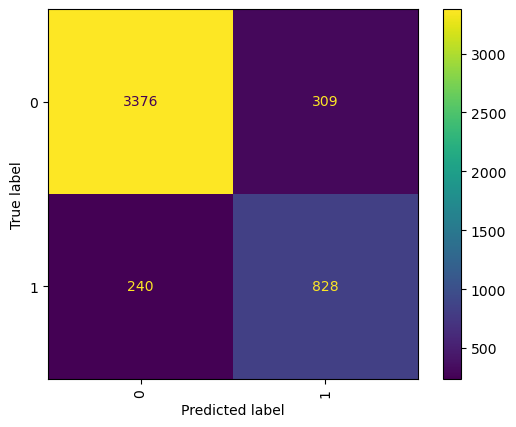

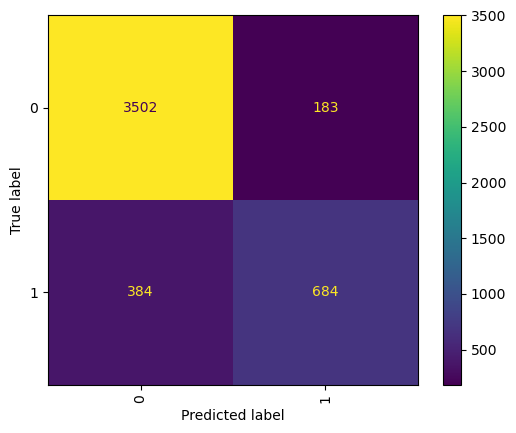

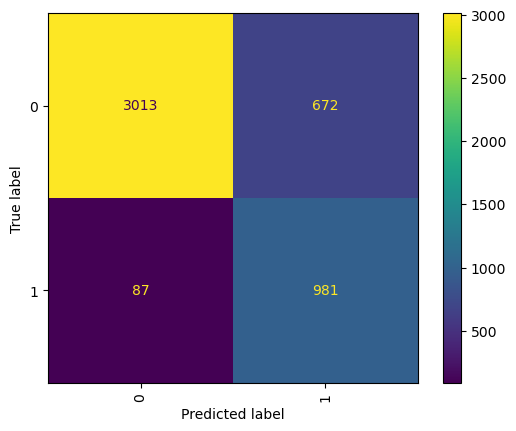

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd


# Entrenar modelo como antes
model_f = LogisticRegression(penalty="none", class_weight="balanced").fit(X_train, Y_train)

# Probabilidades de clase 1 en test
probs_test = model_f.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.7, 0.3]

for th in thresholds:
    # Predecir clase según el umbral
    y_pred_th = (probs_test >= th).astype(int)
    
    # Matriz de confusión
    cm = confusion_matrix(Y_test, y_pred_th)
    tn, fp, fn, tp = cm.ravel()
    
    # Métricas
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    print(f"Umbral = {th}")
    print(f"Exactitud: {accuracy:.3f}")
    print(f"Sensibilidad: {sensitivity:.3f}")
    print(f"Especificidad: {specificity:.3f}")
    print()
    
    # Mostrar matriz de confusión visualmente
    cmd(confusion_matrix=cm,display_labels=model_f.classes_).plot(xticks_rotation="vertical")

---
En este inciso, se generó el modelo de Regresión Logística, y se obtuvieron sus métricas, pero utilizando todo el subconjunto de datos del train. Se generó el vector de probabilidades y se guardó en la variable *probs_test*. Para que el modelo tome la decisión si una observación pertenece a *0* o *1*, se elijieron 3 umbrales, 0.3, 0.5 y 0.7. Si alcanza ese límite, o lo supera, el modelo decide que será *1*, en caso contrario, será *0*. 

Para dichos umbrales se calcularon las métricas de *Exactitud*, *Sensiblidad* y *Especificidad*. Visualmente podemos ver el desempeño de las predicciones en las matrices de confusión generadas para cada umbral.

Observando los resultados del umbral de **50%**, vemos que tiene el mejor *accuracy* de 0.884, significando que, del total de predicciónes, el modelo pudo predecir un 88.4% de los predicciones positivas de manera correcta. De este umbral, vemos que su sensibilidad de 0.775, significando que el modelo predijo un 77.5% de los casos positivos correctamente , y una Especificidad de 0.916, significando que 91.6%. de los casos negativos fueron correctamente predichos.

Para no hacer el análisis más largo, podemos concluir que el umbral que mejor **Accuracy** da, es el de 50%,  mientras que el umbral de 70% tiene la mejor **Especificidad**, con 95%. Y el umbral con mejor **Sensibilidad** terminó siendo el de 30%, con 91.9%. Con todo esto vemos que si queremos mejorar una métrica, es imposible que otras empeoren, y por lo tanto el umbral adecuado dependerá de la aplicación que se le de al modelo. 

5. Grafica la curva ROC para las probabilidades calculadas en el punto previo y reporta el valor de la AUC.

Valor AUC: 0.940


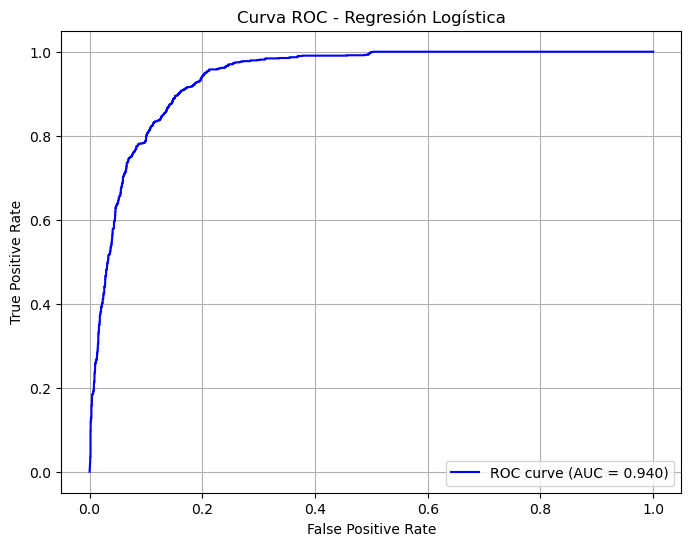

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, probs_test)

# Calcular AUC
auc_score = roc_auc_score(Y_test, probs_test)
print(f"Valor AUC: {auc_score:.3f}")

# Graficar curva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


---
La curva **ROC** (Receiver Operating Characteristic) muestra la relación entre la **tasa de verdaderos positivos** (TPR o sensibilidad) y la **tasa de falsos positivos** (FPR) para diferentes umbrales de decisión del modelo de regresión logística. La curva se acerca bastante al vértice superior izquierdo, lo cual nos indica que el modelo logra una alta tasa de aciertos verdaderos mientras mantiene baja la cantidad de falsos positivos.

El **AUC (Area Under the Curve)** obtenido es 0.940, lo que significa que el modelo tiene un excelente poder de distinción entre las dos clases. En términos prácticos, un AUC de 0.94 implica que, si se eligen al azar un ejemplo positivo y uno negativo, el modelo tiene un 94% de probabilidad de asignar una mayor puntuación al positivo que al negativo. Valores de AUC cercanos a 1 representan modelos muy buenos, mientras que un AUC de 0.5 indicaría un modelo de clasificación aleatorio.

En conclusión, la curva ROC y el valor de AUC muestran que la regresión logística entrenada logra un rendimiento muy alto en este conjunto de datos.

6. Interpreta los resultados del modelo, describiendo cómo es que cada variable afecta a la salida, en términos de los coeficientes generados.

In [13]:
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coeficiente': model_f.coef_[0]
})

# Calcular el efecto en términos de odds ratio
coef_df['Odds_ratio'] = np.exp(coef_df['Coeficiente'])

print(coef_df)

  Variable  Coeficiente  Odds_ratio
0    H001A    -0.000544    0.999456
1    H001D     0.000678    1.000679
2    A111A     0.002028    1.002030
3    K060A     0.012744    1.012826
4    K820A     0.302845    1.353705


### Interpretación de los coeficientes del modelo de regresión logística

El modelo fue entrenado para predecir si el gasto por consumo de energía eléctrica de una unidad económica (`K412A`) revasa el promedio (1), y se considera para esta actividad como "alto", o está por debajo del promedio (0) usando cinco variables:


| Variable | Coeficiente | Odds ratio |
|----------|------------|------------|
| H001A    | -0.000544  | 0.999456   |
| H001D    | 0.000678   | 1.000679   |
| A111A    | 0.002028   | 1.002030   |
| K060A    | 0.012744   | 1.012826   |
| K820A    | 0.302845   | 1.353705   |

---

### Interpretación general

1. **H001A (Personal ocupado total)**: Por cada unidad adicional en H001A, la probabilidad de gasto alto en energía disminuye ligeramente. El efecto es muy pequeño, casi neutro.

2. **H001D (Sueldos y salarios)**: Incrementos en H001D aumentan la probabilidad de gasto alto de forma mínima.

3. **A111A (Producciíon Bruta Total)**: A mayor Producción Bruta Total, la probabilidad de consumo de energía alto aumenta ligeramente.

4. **K060A (Contratación de Servicios Profesionales, Científicos y Técnicos)**: Un aumento en K060A incrementa la probabilidad de gasto alto moderadamente.

5. **K820A (Gastos por Servicios de Comunicación)**: Esta variable tiene el mayor impacto relativo, pues cada unidad adicional aumenta significativamente la probabilidad de gasto alto en energía (~35% en odds).

---

### Interpretación técnica

En regresión logística, vimos que la relación entre predictores y salida se define como:

<center> $P(Y=1 \mid X) = \frac{1}{1 + e^{-z}}, \quad z = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p$</center>



Donde:

- $P(Y=1 \mid X)$ = probabilidad de gasto alto  
- $z$ = logaritmo natural de los **odds** (momios) de que la unidad económica gaste alto  
- $\beta_i$ = coeficiente de cada variable $X_i$

**Interpretación de coeficientes:**

- Cada $\beta_i$ indica **el cambio en el logaritmo natural de los momios** por cada unidad adicional de $X_i$, manteniendo las demás variables constantes.
- Exponenciando $\beta_i$ se obtiene el **odds ratio**, que muestra el multiplicador de los momios para clase 1.


| Variable | Coeficiente | Odds ratio | Interpretación log-odds |
|----------|------------|------------|------------------------|
| H001A    | -0.000544  | 0.999456   | Cada unidad de H001A reduce ln(odds) ligeramente |
| H001D    | 0.000678   | 1.000679   | Cada unidad de H001D aumenta ln(odds) ligeramente |
| A111A    | 0.002028   | 1.002030   | Cada unidad de ingreso aumenta ln(odds) de gastar alto |
| K060A    | 0.012744   | 1.012826   | Incrementos moderados en K060A aumentan ln(odds) |
| K820A    | 0.302845   | 1.353705   | Incrementos en K820A aumentan ln(odds) significativamente (~35% en odds) |

---
**En Resumen**:

- Variables como H001A y H001D tienen efecto casi neutro.  
- Variables económicas como A111A y K060A muestran efecto positivo moderado.  
- K820A es la más influyente, afectando significativamente la probabilidad de gasto alto en energía.  
- Recordemos que técnicamente, todos los coeficientes representan cambios en el **logaritmo natural de los momios**
